In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

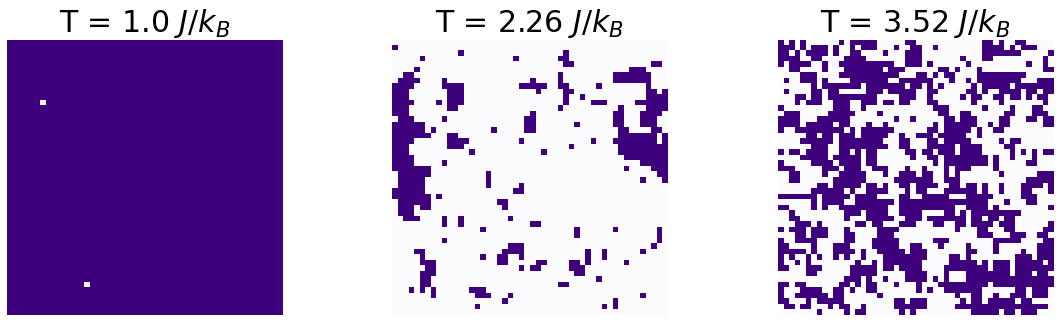

In [66]:
data = pd.read_csv("../Ising/data/50/s3_cfg_L50_A0_mc1000000_burn1_tl1.000_tu3.530.csv", header=None)
X_3 = data.iloc[:, :-1].to_numpy()

y_3 = data.iloc[:, -1][::50].to_numpy() # take every 50th row

X_3 = X_3.reshape(len(y_3), 50*50)
y_3 = y_3.reshape(len(y_3), 1)
# order by y
X_3 = X_3[np.argsort(y_3[:, 0])]
y_3 = y_3[np.argsort(y_3[:, 0])]

# get first, midle and last ramples
X_3_first = X_3[0].reshape(50, 50)
X_3_middle = X_3[len(y_3)//2].reshape(50, 50)
X_3_last = X_3[-1].reshape(50, 50)

# get their y values
y_3_first = y_3[0]
# y_3 middle is the one with t closest to 2.27
y_3_middle = y_3[len(y_3)//2]
y_3_last = y_3[-1]

# remove ticks

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(X_3_first, cmap = "Purples")
axs[0].set_title(f"T = {y_3_first[0]} $J/k_B$", fontsize=30)
axs[1].imshow(X_3_middle, cmap = "Purples")
axs[1].set_title(f"T = {y_3_middle[0]} $J/k_B$", fontsize=30)
axs[2].imshow(X_3_last, cmap = "Purples")
axs[2].set_title(f"T = {y_3_last[0]} $J/k_B$", fontsize=30)
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# tight layout
plt.tight_layout(rect=[-0.06, 0, 1.04, 1]) 
for ax in axs:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
plt.savefig("../figs/L50_configs.pdf")
